# Classify images of clothing

Training a neural network model to classify images of clothing by using tf.keras. It is a high-level API to build and train models in TensorFlow.

In [1]:
# import TensorFlow and tf.keras

import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

# print the tf version
print(tf.__version__)

2.5.0


## Import the Fashion MNIST dataset

Fashion MNIST dataset is used in this test. It contains 70,000 grayscale images in 10 categories and the images show individual articles of clothing at low resolution (28x28 pixels).

In this test, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. 

The first step in Import and load the Fashion MNIST data directly from TensorFlow:

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

After loading the dataset, four NumPy arrays will be returned. The train_images and train_labels arrays are the training set—the data the model uses to learn. The model is tested against the test set, the test_images, and test_labels arrays.
The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. 

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Exploration of the image data

Present the details of training set, including number and size

In [4]:
train_images.shape

(60000, 28, 28)

Present the number of training labels

In [5]:
len(train_labels)

60000

Present the details of test set

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
test_images.shape
len(test_labels)

10000

## Preprocess the data

Inspection of image data in the training set. 

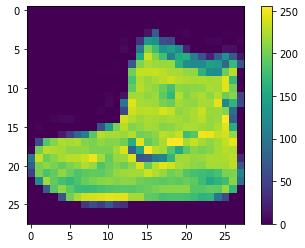

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Before fed them to the neural network model, the pixel values are scaled to a range of 0 to 1. 

In [9]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Verifying the image data before network training by displaying the first 25 images from the training set with image label.

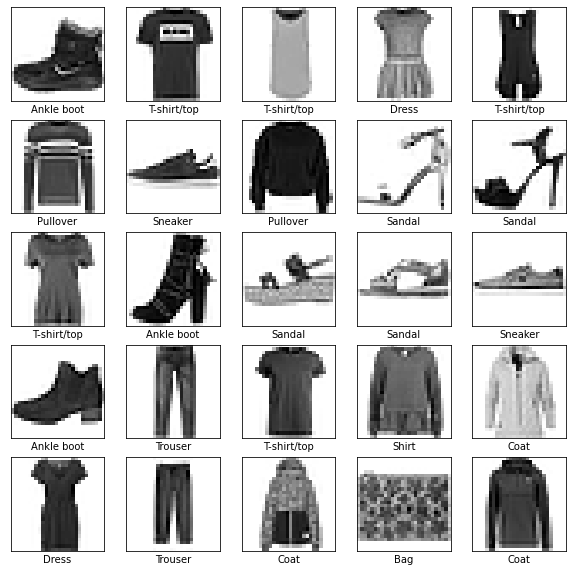

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Building of network

Configuring the layers of the model and compiling the model subsequently.

### Configuration of network layers

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

### Compilation of network layers

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Training of network

### Feed the model using `model.fit` 

In [13]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 505us/step - loss: 0.5074 - accuracy: 0.8225
Epoch 2/10
1875/1875 [==============================] - 1s 498us/step - loss: 0.3830 - accuracy: 0.8624
Epoch 3/10
1875/1875 [==============================] - 1s 488us/step - loss: 0.3434 - accuracy: 0.8761
Epoch 4/10
1875/1875 [==============================] - 1s 494us/step - loss: 0.3146 - accuracy: 0.8847
Epoch 5/10
1875/1875 [==============================] - 1s 484us/step - loss: 0.2972 - accuracy: 0.8903
Epoch 6/10
1875/1875 [==============================] - 1s 480us/step - loss: 0.2837 - accuracy: 0.8946
Epoch 7/10
1875/1875 [==============================] - 1s 480us/step - loss: 0.2707 - accuracy: 0.8996
Epoch 8/10
1875/1875 [==============================] - 1s 477us/step - loss: 0.2591 - accuracy: 0.9034
Epoch 9/10
1875/1875 [==============================] - 1s 479us/step - loss: 0.2492 - accuracy: 0.9061
Epoch 10/10
1875/1875 [==============================] - 1s 482u

### Evaluate model accuracy

In [14]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3280 - accuracy: 0.8864

Test accuracy: 0.8863999843597412


### Provide prediction results

Attach a softmax layer to convert the logits to probabilities, which are easier to interpret.

In [15]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [16]:
predictions = probability_model.predict(test_images)

Take a look at the first prediction:

In [17]:
predictions[0]

array([3.8145009e-07, 3.4430609e-08, 2.6937703e-09, 3.5432726e-09,
       1.8393488e-06, 4.4886335e-03, 5.9403089e-07, 1.7876746e-01,
       1.4695024e-05, 8.1672639e-01], dtype=float32)

Show the label with the highest confidence value

In [18]:
np.argmax(predictions[0])

9

Examining the test label to check whether classification is correct

In [19]:
test_labels[0]

9

Check the prediction results of the full set of 10 class.

In [20]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify the prediction results

Check the results of the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

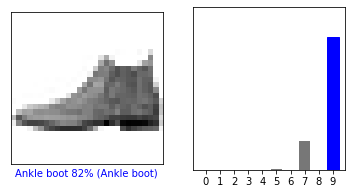

In [21]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

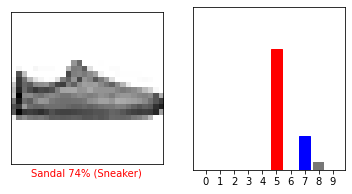

In [22]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Plot several images with their predictions. 


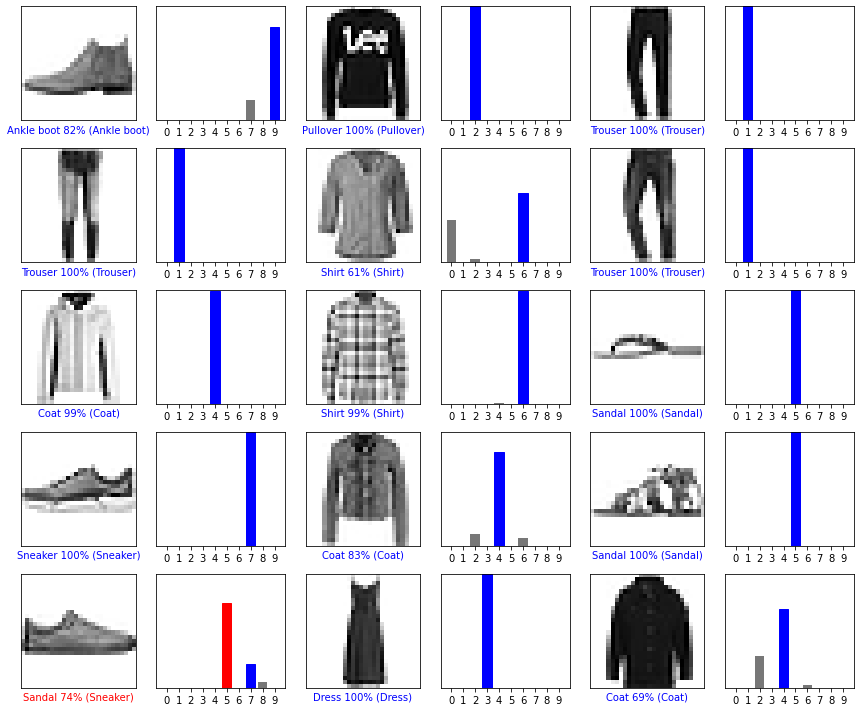

In [23]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Usage of the trained model


Start from single image

In [24]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. 

In [25]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Predict the correct label for this image:

In [26]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[2.2930279e-05 4.6244372e-13 9.9966121e-01 1.7554208e-11 2.4410726e-04
  1.5541798e-10 7.1746254e-05 2.0566091e-15 2.2790463e-09 3.8093087e-17]]


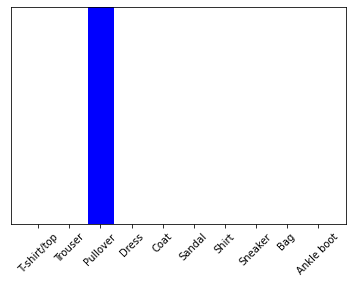

In [27]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

tf.keras.Model.predict returns a list of lists—one list for each image in the batch of data. 

In [28]:
np.argmax(predictions_single[0])

2